HW_8 by 21600055 김동규

1. objective: lab classfication and decsion tree

2. input: mnist.pkl, train_data, test_data

3. output: classification using decision tree and draw decision tree

In [1]:
import numpy as np
import math

# Make dataset

In [2]:
train_data = [
    ["Green",3,'Apple'],
    ['Yellow',3,'Apple'],
    ['Red',1,'Grape'],
    ['Red',1,'Grape'],
    ['Yellow',3,'Lemon'],
    ['Yellow',4,'Lemon'],
]
columns = ['color','diameter','label']

# Make useful functions

In [3]:
def unique_vals(rows,col): # extract unique value of rows
    return set([row[col] for row in rows])

In [5]:
unique_vals(train_data,0) # print unique value of dataset's 1st column

{'Green', 'Red', 'Yellow'}

In [6]:
def class_counts(rows): # count the each data
    counts = {}
    
    for row in rows:
        label = row[-1]
        
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [7]:
class_counts(train_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 2}

In [8]:
def is_numeric(value): # if value is int or float, return true else false
    return isinstance(value,int) or isinstance(value,float)

In [7]:
print(is_numeric(7),is_numeric('Blue'))

True False


# Make a Question class

In [10]:
class Question: # question class
    
    def __init__(self, column, value): # constuctor
        self.column = column
        self.value = value
        
    def compare_with_question(self,example):
        
        val = example[self.column]
        
        if is_numeric(val): # if numeric, compare bigger number, else compare is equal
            return val >= self.value
        else:
            return val == self.value
        
    def __repr__(self): # return reprensetation in string format
        condition = "=="
        
        if is_numeric(self.value):
            condition = ">="
        return "Is {} {} {}?".format(columns[self.column],condition,str(self.value))

In [11]:
Question(1,3)

Is diameter >= 3?

In [12]:
Question(0,"Green")

Is color == Green?

# Make partition function

In [13]:
def partition(rows,question): # split function
    
    true_rows, false_rows = [], []
    
    for row in rows:
        if question.compare_with_question(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    
    return true_rows, false_rows

In [15]:
true_rows , false_rows = partition(train_data,Question(0,"Red")) # question about 'color is red?'

In [16]:
print("The true_rows\n ===> ",true_rows,"\nThe false_rows\n ===>",false_rows)

The true_rows
 ===>  [['Red', 1, 'Grape'], ['Red', 1, 'Grape']] 
The false_rows
 ===> [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]


# Calculate entropy

In [19]:
def entropy(labels,base=None):
    
    n_labels = len(labels)
    
    if n_labels <= 1: # if label count is less or equal 1, return 0
        return 0
    
    counts = class_counts(labels)
    probs = [counts[key] / n_labels for key in counts.keys()]
    
    n_classes = np.count_nonzero(probs)
    
    if n_classes <= 1 :
        return 0
    
    ent = 0.
    
    for i in probs: # compute entropy
        ent -= i * math.log2(i)
    return ent

In [20]:
pure = [['Apple'],
        ['Apple']]
entropy(pure)

0

In [21]:
impure = [['Apple'],
          ["Orange"]]
entropy(impure)

1.0

In [22]:
impure = [['Apple'],
          ["Orange"],
          ["Grape"],
          ["Grapefruit"],
          ['Blueberry']
         ]
entropy(impure)

2.321928094887362

# Calculate information gain

In [23]:
def info_gain(left, right, current_uncertainty):
    
    p = float(len(left) / (len(left) + len(right)))
    
    print("(1) Avg of Impurity = {:.4f} * {:.4f} + {:.4f} * {:.4f}".format(p,entropy(left),# calculate avaerage of impurity
                                                                          (1-p),entropy(right)))
    print("(2) Current uncertainty = {:.4f}".format(current_uncertainty)) # print current uncertainty
    
    IG = current_uncertainty - (p * entropy(left) + (1-p) * entropy(right)) # get Information gain
    print("(3) Information gain = {:.4f} - ({:.4f} * {:.4f} + {:.4f} * {:.4f}) = {:.4f}\n".
         format(current_uncertainty, p, entropy(left), 1-p, entropy(right), IG))
    
    return IG

In [24]:
current_uncertainty = entropy(train_data)
print("\nCurrent uncertainty ===> {:.4f}".format(current_uncertainty))


Current uncertainty ===> 1.5850


In [26]:
print("Question? ",Question(0,"Green"))

true_rows, false_rows = partition(train_data,Question(0,"Green")) # split data about color is green?
print("True rows ===> {}".format(true_rows))
print("False rows ===> {}".format(false_rows))

print("\nThe information gain by partitioning on \"Green\" is {:.4f}".format(
    info_gain(true_rows,false_rows,current_uncertainty)))

Question?  Is color == Green?
True rows ===> [['Green', 3, 'Apple']]
False rows ===> [['Yellow', 3, 'Apple'], ['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219) = 0.3167


The information gain by partitioning on "Green" is 0.3167


In [28]:
print("Question? ",Question(1,3))

true_rows, false_rows = partition(train_data,Question(1,3)) # split data about diameter is bigger than 3?
print("True rows ===> {}".format(true_rows))
print("False rows ===> {}".format(false_rows))

print("\nThe information gain by partitioning on \"Green\" is {:.4f}".format(
    info_gain(true_rows,false_rows,current_uncertainty)))

Question?  Is diameter >= 3?
True rows ===> [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon'], ['Yellow', 4, 'Lemon']]
False rows ===> [['Red', 1, 'Grape'], ['Red', 1, 'Grape']]
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000) = 0.9183


The information gain by partitioning on "Green" is 0.9183


# Find best split based on information gain

In [33]:
def find_best_split(rows): # find best question of split data
    
    best_gain = 0
    best_question = None
    
    current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1
    
    for col in range(n_features):
        
        values = set([row[col] for row in rows])
        
        for val in values:
            
            question = Question(col,val)
            true_rows, false_rows = partition(rows,question)
            
            if(len(true_rows)==0 or len(false_rows)==0):
                continue
            print("Question ===>",question)
            gain = info_gain(true_rows,false_rows,current_uncertainty)
            
            if gain >= best_gain:
                best_gain, best_question = gain, question
    
    return best_gain, best_question

In [34]:
find_best_split(train_data)

Question ===> Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000) = 0.9183

Question ===> Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183) = 0.6667

Question ===> Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219) = 0.3167

Question ===> Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000) = 0.9183

Question ===> Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219) = 0.3167



(0.9182958340544894, Is diameter >= 3?)

# Make Decision Tree

In [35]:
class Leaf: # Leaf node classifies data
    
    def __init__(self,rows):
        self.predictions = class_counts(rows)

In [36]:
class Decision_Node: # Decision node that asks a quesitons.
    
    def __init__(self,
                 question,
                 true_branch,
                 false_branch
                ):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [39]:
def build_tree(rows): # build Tree , recursive
    
    gain, question = find_best_split(rows)
    
    if gain == 0: # if gain is 0, it is leaf
        return Leaf(rows)
    
    true_rows, false_rows = partition(rows,question)
    
    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)
    
    return Decision_Node(question,true_branch,false_branch)

In [41]:
def print_tree(node,spacing=""): 
    
    if isinstance(node,Leaf):
        print(spacing + "Predict",node.predictions)
        return

    print(spacing + str(node.question))
    
    print(spacing + '--> True: ')
    print_tree(node.true_branch,spacing + " ")
    
    print(spacing + '--> False: ')
    print_tree(node.false_branch,spacing + " ")

In [42]:
my_tree = build_tree(train_data) 
print(type(my_tree))

Question ===> Is color == Red?
(1) Avg of Impurity = 0.3333 * 0.0000 + 0.6667 * 1.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.3333 * 0.0000 + 0.6667 * 1.0000) = 0.9183

Question ===> Is color == Yellow?
(1) Avg of Impurity = 0.5000 * 0.9183 + 0.5000 * 0.9183
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.5000 * 0.9183 + 0.5000 * 0.9183) = 0.6667

Question ===> Is color == Green?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219) = 0.3167

Question ===> Is diameter >= 3?
(1) Avg of Impurity = 0.6667 * 1.0000 + 0.3333 * 0.0000
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.6667 * 1.0000 + 0.3333 * 0.0000) = 0.9183

Question ===> Is diameter >= 4?
(1) Avg of Impurity = 0.1667 * 0.0000 + 0.8333 * 1.5219
(2) Current uncertainty = 1.5850
(3) Information gain = 1.5850 - (0.1667 * 0.0000 + 0.8333 * 1.5219) = 0.3167

Que

In [43]:
print_tree(my_tree) # print the builded decision tree

Is diameter >= 3?
--> True: 
 Is diameter >= 4?
 --> True: 
  Predict {'Lemon': 1}
 --> False: 
  Is color == Yellow?
  --> True: 
   Predict {'Apple': 1, 'Lemon': 1}
  --> False: 
   Predict {'Apple': 1}
--> False: 
 Predict {'Grape': 2}


In [44]:
def classify(row,node): # classify function
    
    if isinstance(node,Leaf): # if node is leaf, return predicted results.
        return node.predictions
    
    if node.question.compare_with_question(row):
        return classify(row,node.true_branch)
    else:
        return classify(row,node.false_branch)

In [45]:
classify(train_data[0],my_tree)

{'Apple': 1}

In [46]:
def print_leaf(counts): # print leaf node
    total = sum(counts.values()) * 1.0
    probs = {}
    
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [47]:
print_leaf(classify(train_data[0],my_tree))

{'Apple': '100%'}

In [48]:
print_leaf(classify(train_data[1],my_tree))

{'Apple': '50%', 'Lemon': '50%'}

# Test based on decision tree

In [50]:
testing_data = [ # test data
    ["Green",3,"Apple"],
    ["Yellow",4,"Apple"],
    ["Red",2,"Grape"],
    ["Red",1,"Grape"],
    ["Yellow",3,"Lemon"],
]

In [51]:
for row in testing_data:
    print("Actual: %s. Predicted: %s" % # print compare actual data and predicted data
            (row[-1],print_leaf(classify(row,my_tree)))
         )

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Lemon': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


In [53]:
import pandas as pd

train_df = pd.DataFrame(train_data,columns = ["color","diameter","label"]) # make dataframe
train_df

,color,diameter,label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon
5,Yellow,4,Lemon


# Visualize decision tree

In [55]:
from sklearn.preprocessing import LabelEncoder # use sklearn
encoder = LabelEncoder()
train_df['color'] = encoder.fit_transform(train_df['color'])

[Text(0.3333333333333333, 0.875, 'diameter <= 2.0\nentropy = 1.585\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 33.3%\nvalue = [0.0, 1.0, 0.0]'),
 Text(0.5, 0.625, 'color <= 1.0\nentropy = 1.0\nsamples = 66.7%\nvalue = [0.5, 0.0, 0.5]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 16.7%\nvalue = [1.0, 0.0, 0.0]'),
 Text(0.6666666666666666, 0.375, 'diameter <= 3.5\nentropy = 0.918\nsamples = 50.0%\nvalue = [0.333, 0.0, 0.667]'),
 Text(0.5, 0.125, 'entropy = 1.0\nsamples = 33.3%\nvalue = [0.5, 0.0, 0.5]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 16.7%\nvalue = [0.0, 0.0, 1.0]')]

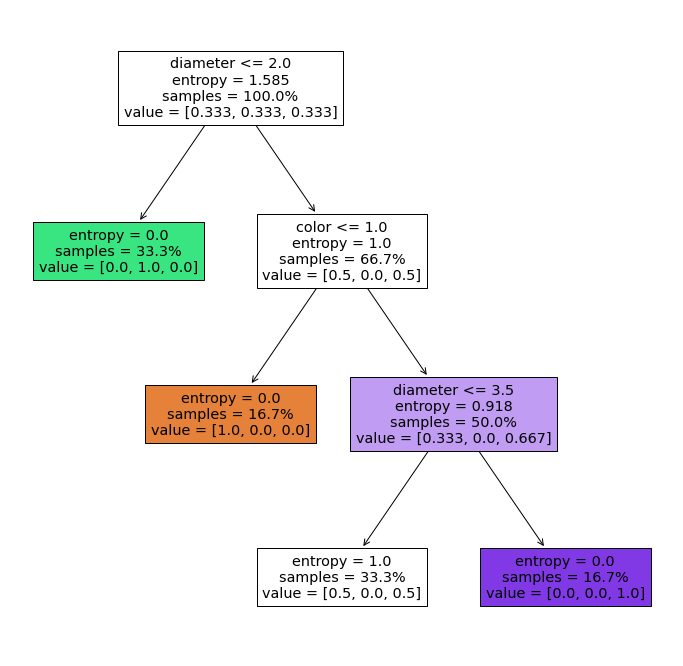

In [58]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn

decisionTree = DecisionTreeClassifier(random_state=0,criterion="entropy")
decisionTree.fit(train_df.iloc[:,0:2],train_df.iloc[:,2])

plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(decisionTree,filled=True,feature_names=["color","diameter"],proportion=True) # visualize

# Load MNIST data and split train and test data

In [65]:
import pickle
with open("./mnist.pkl",'rb') as f: # load mnist file
    train_set, valid_set, test_set = pickle.load(f,encoding="latin1")
    print("... loading data")

... loading data


In [66]:
train_x, train_y = train_set 
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y,columns = ['label'])

In [67]:
decisionTree = DecisionTreeClassifier(random_state=0,criterion="entropy")
decisionTree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
print("===> Test set score : {:.2f}".format(decisionTree.score(test_x,test_y)))

===> Test set score : 0.88


In [69]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(random_state=0) # make randomforest
rforest.fit(train_x,train_y)

/var/folders/gb/5bb9gwbn4cn84rmsk3wjbmxm0000gn/T/ipykernel_844/3439419474.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(train_x,train_y)


RandomForestClassifier(random_state=0)

In [70]:
print("Test set score: {:.2f}".format(rforest.score(test_x,test_y)))

Test set score: 0.97


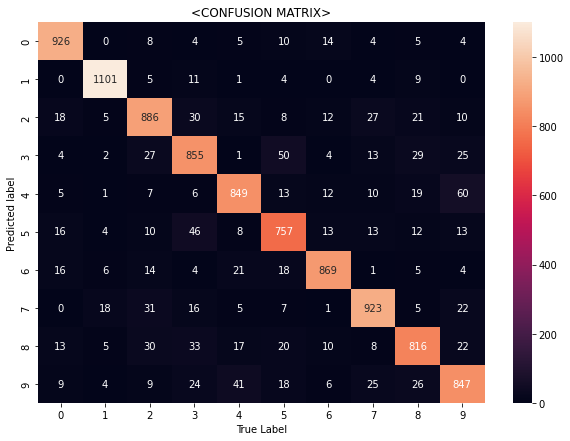

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

pred_y = decisionTree.predict(test_x)
cmdtree = confusion_matrix(test_y,pred_y)

plt.figure(figsize = (10,7))
sn.heatmap(cmdtree,annot=True,fmt='d')

plt.title("<CONFUSION MATRIX>")
plt.ylabel("Predicted label")
plt.xlabel("True Label")

plt.show()

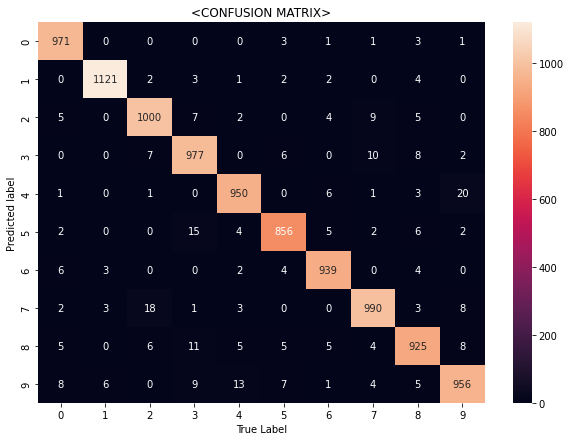

In [87]:
pred_y = rforest.predict(test_x)
rtree_cmd = confusion_matrix(test_y,pred_y)

plt.figure(figsize = (10,7))
sn.heatmap(rtree_cmd, annot=True,fmt ='d')

plt.title("<CONFUSION MATRIX>")
plt.ylabel("Predicted label")
plt.xlabel("True Label")

plt.show()